In [1]:
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, roc_auc_score, confusion_matrix, classification_report

warnings.filterwarnings(action='ignore')
plt.rc('font', family='Noto Sans CJK JP')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rc('font',family = 'Noto Sans CJK JP')

In [3]:
df_all = pd.read_csv('./final_df_all_.csv',engine = 'python')
df_all.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,500-599만원
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원


In [4]:
df_all.columns

Index(['chaju_id', 'credit_class', 'score_risk', 'gender', 'age', 'agegroup',
       'job', 'edu', 'dwell_type', 'house_type', 'marriage', 'income_home_grp',
       'expenditure_grp', 'child_cd', 'no_child', 'flag_priv_biz_cd',
       'card_count', 'card_period', 'loan_period', 'Pcard_loan_amt',
       'over_period', 'Pcard_over_amt', 'over_amt', 'loan_amt_final2',
       'del_rate', 'loan_count', 'overdue_count', 'income_ind_grp'],
      dtype='object')

In [5]:
df_all.describe()

,score_risk,age,no_child,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1.984000e+03,1984.000000,1.984000e+03,1.984000e+03,1.984000e+03,1984.0,1984.000000,1984.000000
mean,431.570060,48.907258,1.358871,2.390625,48.804435,29.624496,1.498790e+05,5.435484,1.064819e+05,7.416406e+06,6.822743e+07,inf,2.669859,0.445565
std,97.223664,14.958557,0.921663,1.866479,38.657033,36.277932,1.335523e+06,15.765646,3.278370e+06,5.125328e+07,1.385082e+08,NaN,3.512011,1.207248
min,185.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
25%,360.000000,37.000000,0.000000,1.000000,25.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
50%,428.000000,48.000000,2.000000,2.000000,48.000000,19.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.310000e+07,0.0,1.000000,0.000000
75%,491.000000,60.000000,2.000000,4.000000,75.000000,45.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.752500e+07,0.0,4.000000,0.000000
max,824.000000,85.000000,3.000000,10.000000,176.000000,193.000000,2.790000e+07,150.000000,1.400000e+08,1.502500e+09,1.800000e+09,inf,19.000000,11.000000


In [6]:
df_all.replace([np.inf, -np.inf], 1000, inplace = True)
df_all

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,500-599만원
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,C-2996,C05,448,남성,41,40대,사무직,대학교 졸업,자가,단독주택,...,29.0,0.0,0.0,0.0,0.0,68000000.0,0.000000,2.0,0.0,200-299만원
1980,C-2997,C04,308,남성,37,30대,사무직,대학교 졸업,자가,아파트,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,99만원 이하
1981,C-2998,C04,371,여성,50,50대,기능/노무직,고등학교 졸업,자가,아파트,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,200-299만원
1982,C-2999,C04,398,남성,42,40대,기능/노무직,전문대학 졸업,전세,아파트,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,300-399만원


# EDA

## 등급별 주거지

<AxesSubplot:xlabel='credit_class', ylabel='count'>

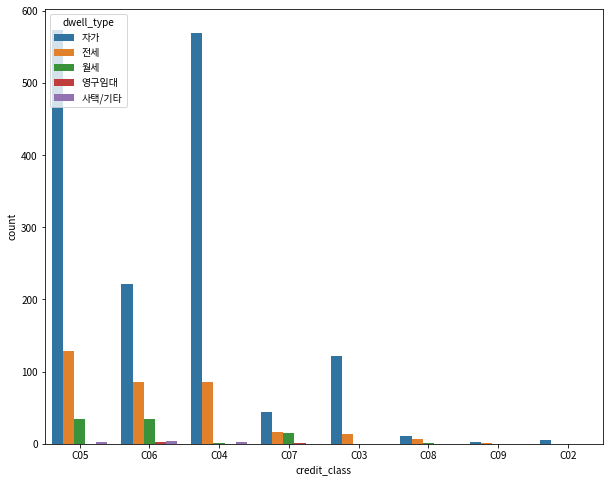

In [7]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'credit_class', hue = 'dwell_type' , data = df_all)

## 전체 상관계수

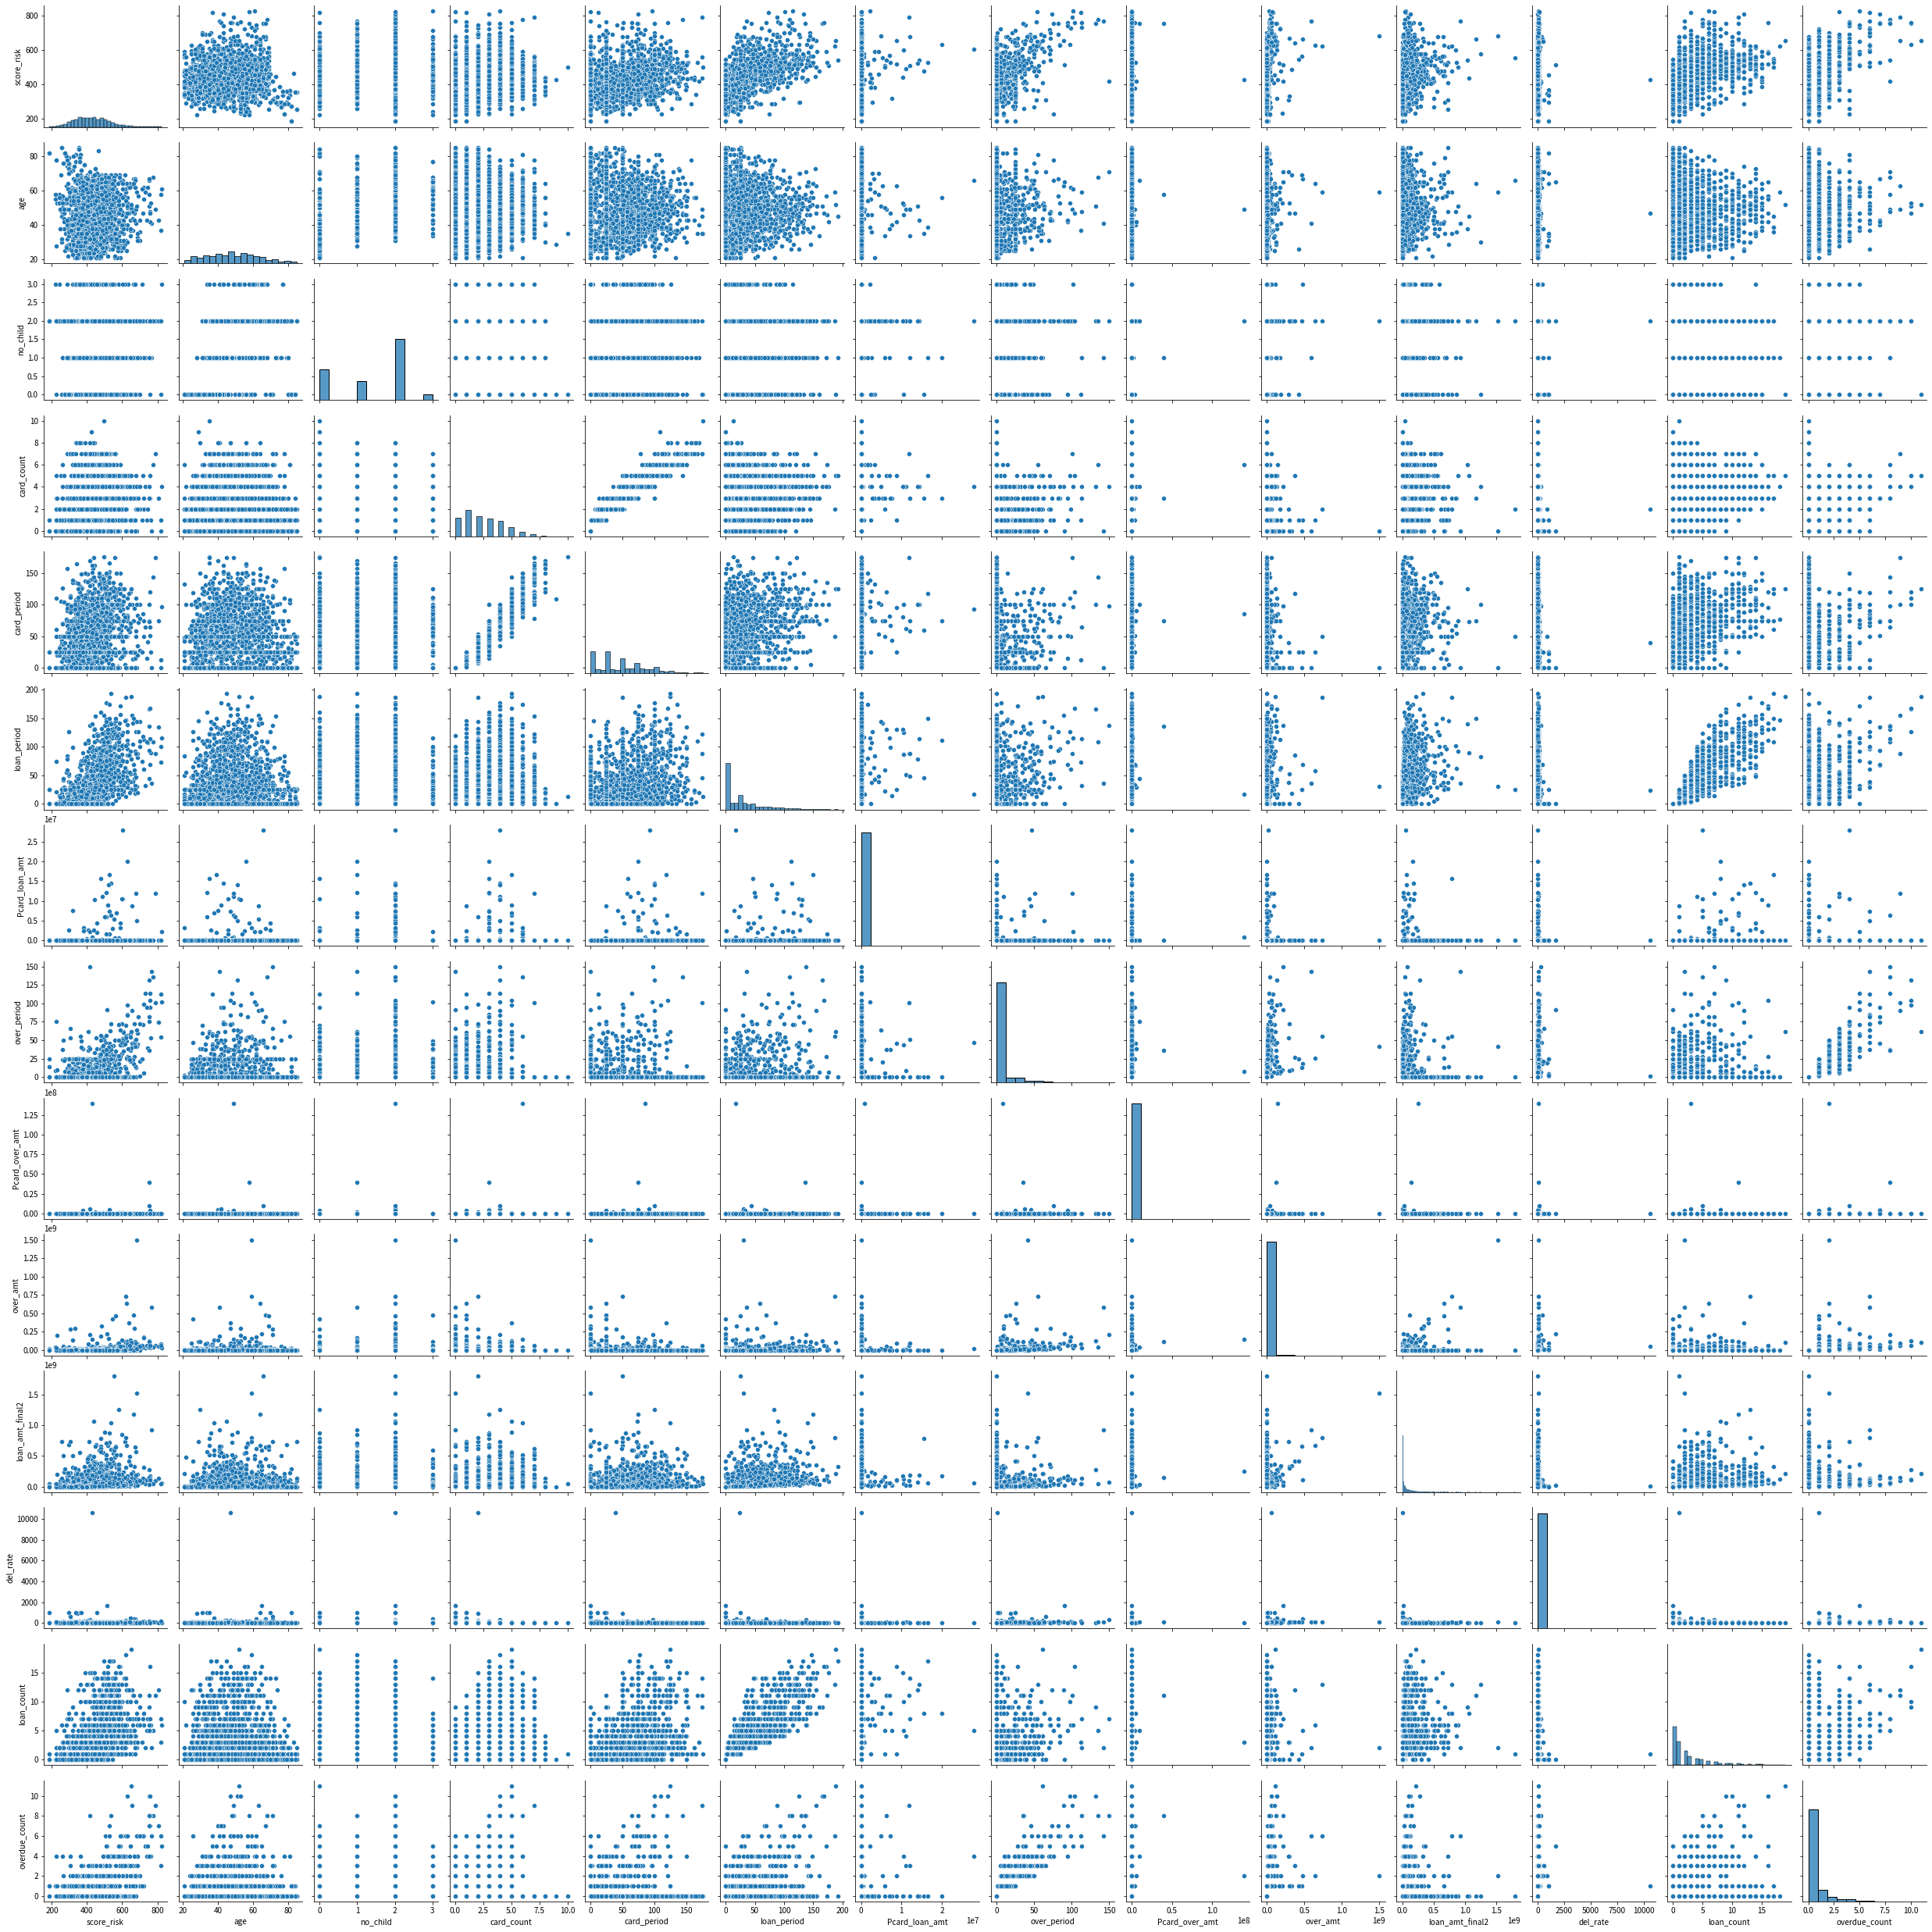

In [8]:
# 관계성 없음
sns.pairplot(df_all)

## 등급별 카드개수 카운트
### 다중채무자 판별

<AxesSubplot:title={'center':'등급별 카드개수 카운트'}, xlabel='credit_class', ylabel='count'>

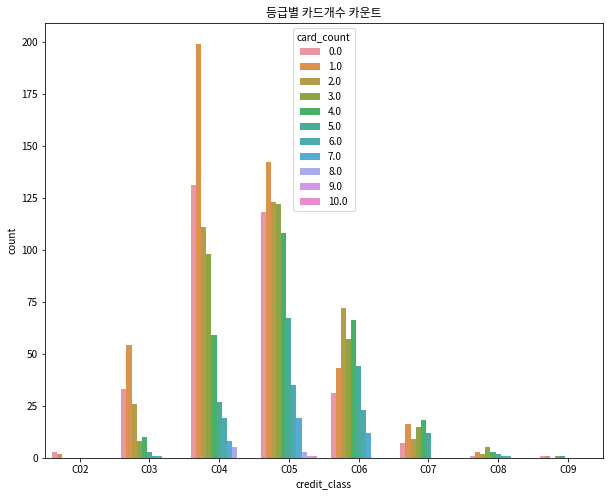

In [9]:
# C6 이후는 카드 카운트가 2개 이상
plt.figure(figsize = (10,8))
plt.title('등급별 카드개수 카운트')
list_ = ['C02','C03','C04','C05','C06','C07','C08','C09']
sns.countplot(x = 'credit_class', hue = 'card_count' , data = df_all, order = list_)

In [12]:
df_all_cardcnt_over3 = df_all[df_all['card_count'] > 2]

In [25]:
over3 = df_all_cardcnt_over3.groupby('credit_class')['card_count'].sum()


Index(['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09'], dtype='object', name='credit_class')

In [26]:
over3_df = pd.DataFrame(zip(over3.index,over3))
over3_df

,0,1
0,C03,92.0
1,C04,875.0
2,C05,1519.0
3,C06,877.0
4,C07,177.0
5,C08,50.0
6,C09,7.0


<BarContainer object of 7 artists>

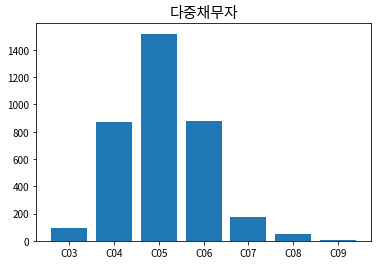

In [38]:
plt.title('다중채무자', fontsize=15)
plt.bar(over3_df[0], over3_df[1])

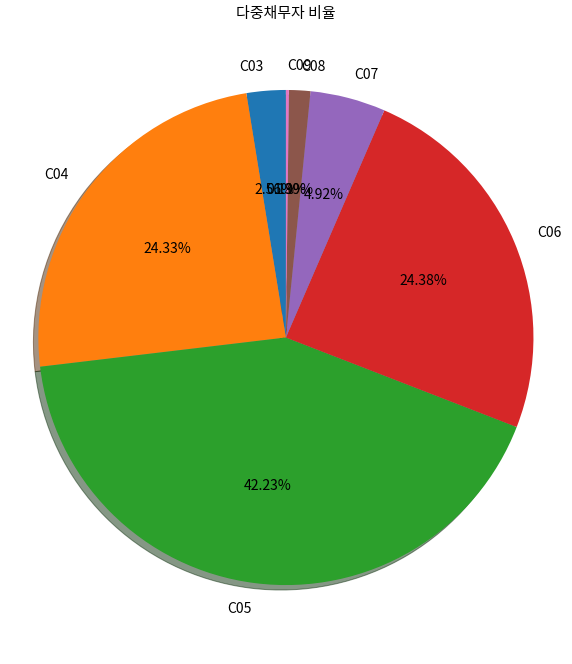

In [36]:
plt.figure(figsize = (10,8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.2, wspace=0.2, hspace=0.2)
plt.pie(over3_df[1],

        labels=over3_df[0], 

#         colors=group_colors, 

        autopct='%1.2f%%', # second decimal place

        shadow=True, 

        startangle=90,

        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('다중채무자 비율', fontsize=15)

plt.show()


In [39]:
all_ = df_all.groupby('credit_class')['card_count'].sum()
all_

credit_class
C02       2.0
C03     198.0
C04    1296.0
C05    1907.0
C06    1064.0
C07     211.0
C08      57.0
C09       8.0
Name: card_count, dtype: float64

In [40]:
all_df = pd.DataFrame(zip(all_.index,all_))
all_df

,0,1
0,C02,2.0
1,C03,198.0
2,C04,1296.0
3,C05,1907.0
4,C06,1064.0
5,C07,211.0
6,C08,57.0
7,C09,8.0


<BarContainer object of 7 artists>

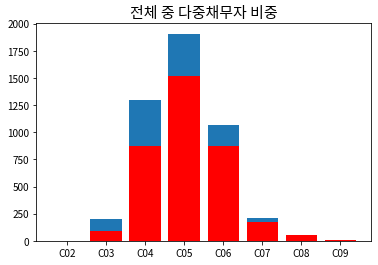

In [42]:
plt.title('전체 중 다중채무자 비중', fontsize=15)
plt.bar(all_df[0], all_df[1])
plt.bar(over3_df[0], over3_df[1], color='red')

## 개인사업자 여부에 따른 연체율

In [14]:
alone_y = df_all[df_all['flag_priv_biz_cd'] == 'Y']
alone_y

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,500-599만원
7,C-1008,C06,528,남성,35,30대,판매/서비스직,대학교 졸업,전세,아파트,...,110.0,0.0,0.0,0.0,0.0,78910000.0,0.000000,11.0,0.0,300-399만원
23,C-1024,C04,374,여성,63,60대,전업주부,고등학교 졸업,자가,단독주택,...,1.0,0.0,0.0,0.0,0.0,50000.0,0.000000,1.0,0.0,200-299만원
24,C-1025,C04,307,남성,71,70대,학생(재수생포함),대학교 재학,자가,아파트,...,31.0,0.0,0.0,0.0,0.0,224000000.0,0.000000,2.0,0.0,200-299만원
37,C-1038,C04,331,여성,59,50대,판매/서비스직,대학교 졸업,자가,아파트,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,300-399만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,C-2953,C05,481,남성,58,50대,기능/노무직,고등학교 졸업,자가,단독주택,...,50.0,0.0,0.0,0.0,0.0,49100000.0,0.000000,2.0,0.0,300-399만원
1938,C-2954,C04,378,남성,49,40대,행정관리/전문직,대학원 졸업,자가,단독주택,...,33.0,0.0,25.0,3500000.0,3500000.0,13800000.0,25.362319,2.0,1.0,100-199만원
1946,C-2962,C05,438,남성,46,40대,사무직,대학교 졸업,자가,단독주택,...,20.0,0.0,0.0,0.0,0.0,35000000.0,0.000000,1.0,0.0,99만원 이하
1972,C-2989,C06,508,여성,38,30대,판매/서비스직,고등학교 졸업,자가,아파트,...,66.0,0.0,0.0,0.0,0.0,25010000.0,0.000000,8.0,0.0,100-199만원


<AxesSubplot:xlabel='credit_class', ylabel='count'>

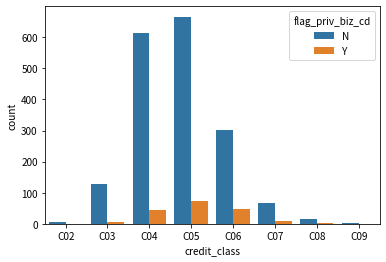

In [19]:
# 전체 비율 - 개인사업자인 경우는 적음 / 있어도 C5가 가장 많음
sns.countplot(x = 'credit_class', hue = 'flag_priv_biz_cd' , data = df_all, order = list_)

In [43]:
alone_y.columns

Index(['chaju_id', 'credit_class', 'score_risk', 'gender', 'age', 'agegroup',
       'job', 'edu', 'dwell_type', 'house_type', 'marriage', 'income_home_grp',
       'expenditure_grp', 'child_cd', 'no_child', 'flag_priv_biz_cd',
       'card_count', 'card_period', 'loan_period', 'Pcard_loan_amt',
       'over_period', 'Pcard_over_amt', 'over_amt', 'loan_amt_final2',
       'del_rate', 'loan_count', 'overdue_count', 'income_ind_grp'],
      dtype='object')

In [46]:
alone_y['del_rate'].value_counts()

0.000000        160
91.108672         1
42.460663         1
162.592593        1
92.778335         1
25.362319         1
32.855436         1
1.794658          1
69.143128         1
22.772277         1
27.179171         1
49.468357         1
77.011937         1
33.327571         1
101.739340        1
53.287705         1
2.216452          1
45.493562         1
14.356709         1
61.428261         1
1.069314          1
10600.000000      1
13.567404         1
Name: del_rate, dtype: int64

In [54]:
alone_rate = alone_y.groupby('del_rate')['del_rate'].count()
alone_rate

del_rate
0.000000        160
1.069314          1
1.794658          1
2.216452          1
13.567404         1
14.356709         1
22.772277         1
25.362319         1
27.179171         1
32.855436         1
33.327571         1
42.460663         1
45.493562         1
49.468357         1
53.287705         1
61.428261         1
69.143128         1
77.011937         1
91.108672         1
92.778335         1
101.739340        1
162.592593        1
10600.000000      1
Name: del_rate, dtype: int64

In [55]:
alone_rate_df = pd.DataFrame(zip(alone_rate.index,alone_rate))
alone_rate_df

,0,1
0,0.000000,160
1,1.069314,1
2,1.794658,1
3,2.216452,1
4,13.567404,1
5,14.356709,1
6,22.772277,1
7,25.362319,1
8,27.179171,1
9,32.855436,1


## 기타

<AxesSubplot:xlabel='credit_class', ylabel='count'>

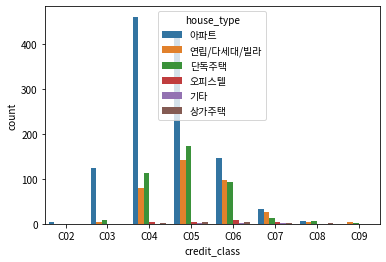

In [20]:
sns.countplot(x = 'credit_class', hue = 'house_type' , data = df_all, order = list_)

<AxesSubplot:xlabel='credit_class', ylabel='count'>

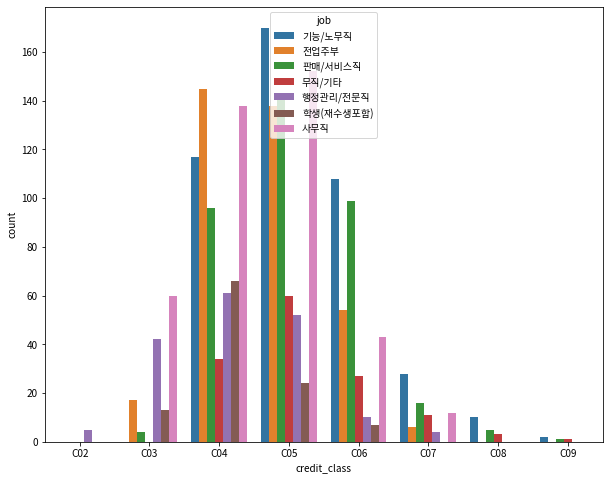

In [50]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'credit_class', hue = 'job' , data = df_all, order = list_)